**Машинное обучение (семинары в записи)**

***Урок 11. Качество модели и её улучшение***

Тебе предстоит разработать модель машинного обучения для предсказания вероятности оттока клиентов в телекоммуникационной компании. У тебя есть набор данных, который содержит различные признаки о клиентах, такие как возраст, пол, тип подключения, длительность пользования услугами и т.д.

Твоя задача состоит в следующем:

1. Загрузить данные и провести предварительный анализ данных.

2. Подготовить данные для обучения модели. Это может включать удаление ненужных признаков, заполнение пропущенных значений и нормализацию данных.

3. Разделить данные на обучающую и тестовую выборки.

4. Выбрать модель машинного обучения, которую ты хочешь использовать для предсказания оттока клиентов. Например, можно использовать модель классификации, такую как логистическая регрессия или случайный лес.

5. Обучить модель на обучающей выборке и оценить ее производительность на тестовой выборке.

6. Провести анализ результатов и оценить важность различных признаков для предсказания оттока клиентов.

7. При необходимости, провести дополнительные эксперименты, чтобы улучшить производительность модели. Это может включать изменение параметров модели, добавление новых признаков или использование другой модели машинного обучения.

In [63]:
import pandas as pd
import numpy as np

df = pd.read_csv("sample_data/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Описание столбцов датасета:**

- Customer ID - уникальный номер клиента
- gender - пол
- SeniorCitizen - является ли клиент пенсионером или нет (1, 0)
- Partner - имеется ли у клиента партнер (Да, Нет)
- Dependents - имеет ли клиент иждивенцев или нет (Да, Нет)
- tenure - количество месяцев, которое клиент провел в компании
- PhoneService - имеет ли клиент телефонное обслуживание или нет (Да, Нет)
- MultipleLines - имеет ли клиент несколько линий или нет (Да, Нет, Нет телефонного обслуживания)
- InternetService - поставщик услуг интернет-провайдера (DSL, оптоволокно, нет)
- OnlineSecurity - имеется ли у клиента онлайн-безопасность или нет (Да, Нет, Нет Интернет-сервис)
- OnlineBackup - прибегал ли клиент к резервному копированию в интернете (Да, Нет, Нет телефонного обслуживания)
- DeviceProtection - подключена ли у клиента защита устройства (Да, Нет, Нет телефонного обслуживания)
- TechSupport - имеется ли у клиента техническая поддержка устройства (Да, Нет, Нет телефонного обслуживания)
- StreamingTV - имеется ли у клиента онлайн трансляция телевизионных программ и видео контента через интернет (Да, Нет, Нет телефонного обслуживания)
- StreamingMovies - имеется ли у клиента сервис, который предоставляет доступ к фильмам и телевизионным шоу через интернет для просмотра на устройствах, подключенных к сети (Да, Нет, Нет телефонного обслуживания)
- Contract - срок действия контракта клиента
- PaperlessBilling - отправляет ли клиент счета и квитанции за услуги или товары электронным способом (Да, Нет, Нет телефонного обслуживания)
- PaymentMethod - способ оплаты клиента
- MonthlyCharges - ежемесячные расходы клиента
- TotalCharges - общие расходы клиента
- church - отток клиента(Да, Нет)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [65]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [66]:
# Проверка на нулевые значения
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [67]:
# Проверка на NaN значения
df.isnull().any().any()

False

In [68]:
# Проверка на дубликаты
df_duble = df[df.duplicated()]
print("Количество дубликатов:", df_duble.shape)

Количество дубликатов: (0, 21)


In [69]:
# Статистический анализ числовых переменных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [70]:
# Статистический анализ объектных признаков
df.describe(include='object').T

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [71]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService',
                  'PaperlessBilling', 'Churn']

df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}).astype(int)

<ipython-input-71-e691aef5a8f3>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}).astype(int)


In [72]:
print(df[binary_columns].head())

   gender  Partner  Dependents  PhoneService  PaperlessBilling  Churn
0       0        1           0             0                 1      0
1       1        0           0             1                 0      0
2       1        0           0             1                 1      1
3       1        0           0             0                 0      0
4       0        0           0             1                 1      1


In [73]:
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,3385
Yes,2967
No phone service,680


In [74]:
df['MultipleLines'] = df['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 2}).astype(int)

<ipython-input-74-27628848cd30>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MultipleLines'] = df['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 2}).astype(int)


In [75]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2416
No,1520


In [76]:
df['InternetService'] = df['InternetService'].replace({'Fiber optic': 1, 'No': 0, 'DSL': 2}).astype(int)

<ipython-input-76-8c5dc4d981a5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['InternetService'] = df['InternetService'].replace({'Fiber optic': 1, 'No': 0, 'DSL': 2}).astype(int)


In [77]:
df['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,3497
Yes,2015
No internet service,1520


In [78]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 2}).astype(int)

<ipython-input-78-a161cbbad680>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 2}).astype(int)


In [79]:
df['OnlineBackup'].value_counts()

,count
OnlineBackup,
No,3087
Yes,2425
No internet service,1520


In [80]:
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 2}).astype(int)

<ipython-input-80-a0b635970337>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 2}).astype(int)


In [81]:
df['DeviceProtection'].value_counts()

,count
DeviceProtection,
No,3094
Yes,2418
No internet service,1520


In [82]:
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 2}).astype(int)

<ipython-input-82-96420b72f456>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 2}).astype(int)


In [83]:
df['TechSupport'].value_counts()

,count
TechSupport,
No,3472
Yes,2040
No internet service,1520


In [84]:
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 2}).astype(int)

<ipython-input-84-fae8718e057a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 2}).astype(int)


In [85]:
df['StreamingTV'].value_counts()

,count
StreamingTV,
No,2809
Yes,2703
No internet service,1520


In [86]:
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 2}).astype(int)

<ipython-input-86-6aa2c212c56c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 2}).astype(int)


In [87]:
df['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2781
Yes,2731
No internet service,1520


In [88]:
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 2}).astype(int)

<ipython-input-88-66aa84e6e9b2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 2}).astype(int)


In [90]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


In [91]:
df['Contract'] = df['Contract'].replace({'One year': 1, 'Month-to-month': 0, 'Two year': 2}).astype(int)

<ipython-input-91-fe8285294959>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Contract'] = df['Contract'].replace({'One year': 1, 'Month-to-month': 0, 'Two year': 2}).astype(int)


In [92]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


In [93]:
df['PaymentMethod'] = df['PaymentMethod'].replace({'Mailed check': 1, 'Electronic check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}).astype(int)

<ipython-input-93-74609a46cf9b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaymentMethod'] = df['PaymentMethod'].replace({'Mailed check': 1, 'Electronic check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}).astype(int)


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [97]:
# Удалим первый столбец - он нам не понадобиться
df = df.drop('customerID', axis=1)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

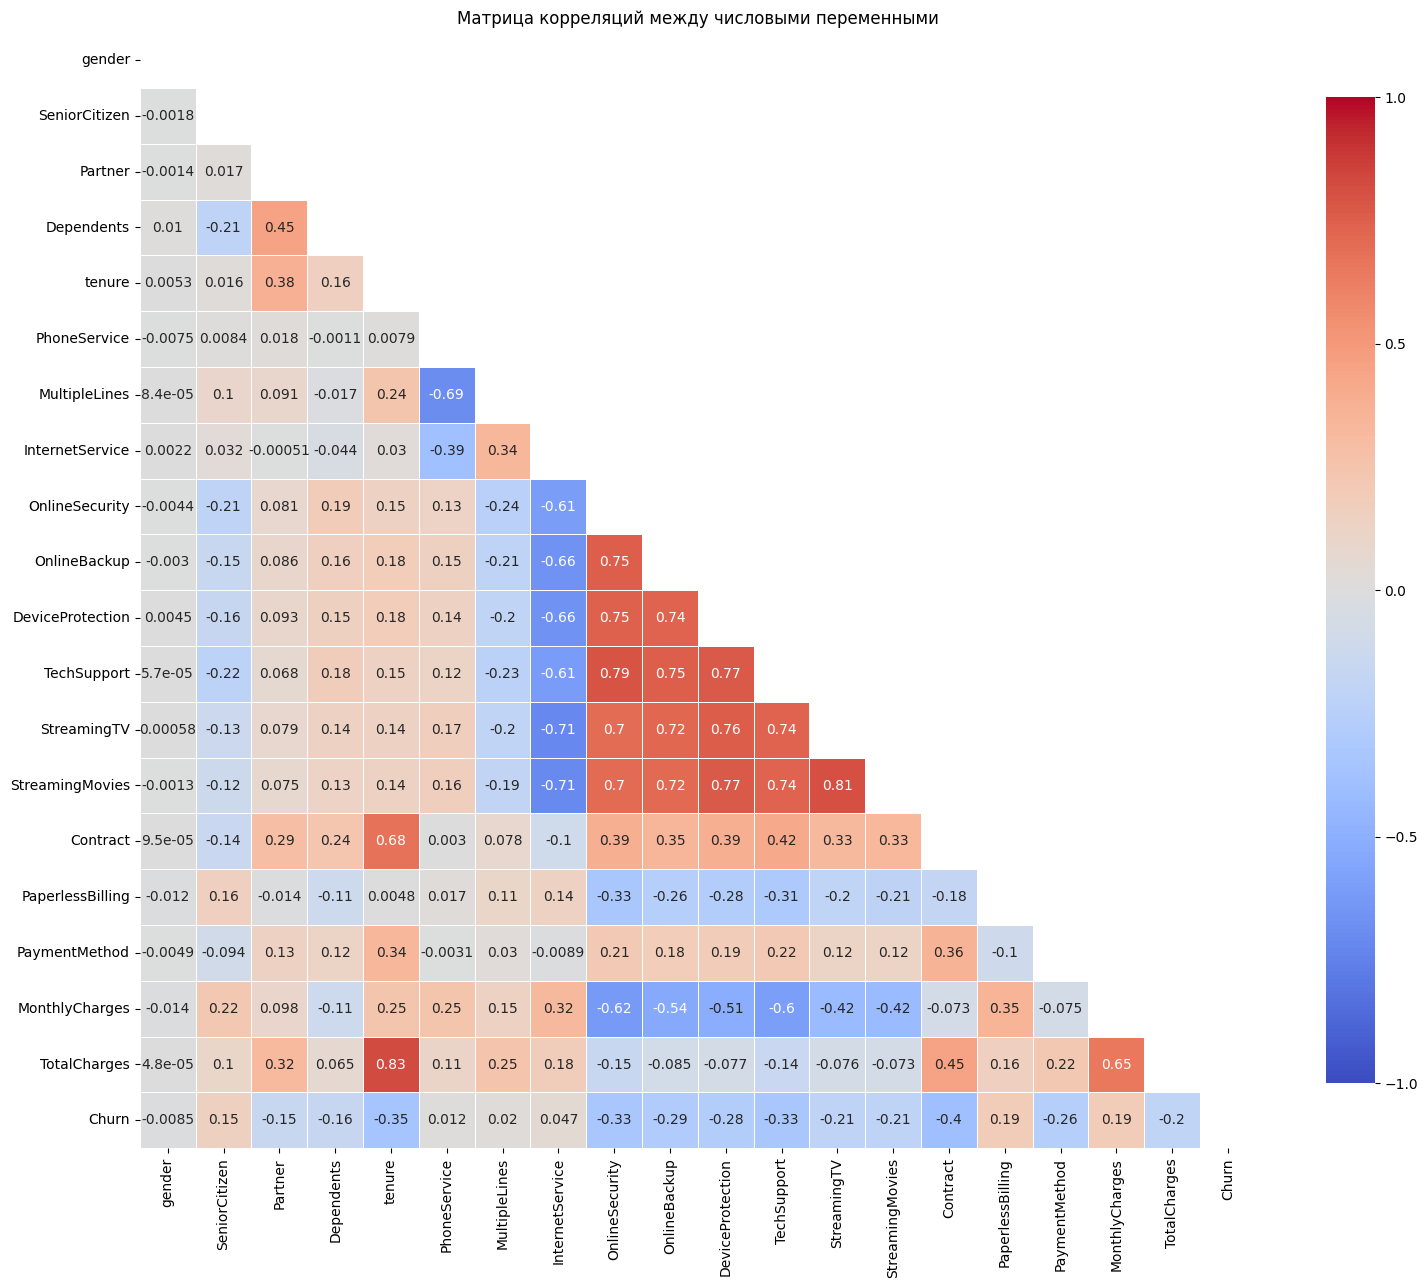

In [105]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()

Матрица показывает, что есть сильная зависимость:
- между общими расходами клиентов ('TotalCharges') и количеством месяцев, которые клиент обслуживался в компании ('tenure') (0.83), что является логичным;
- между сроком действия контракта ('Contract') и количеством месяцев, которые клиент обслуживался в компании ('tenure')(0.68);
- между общими расходами клиентов ('TotalCharges') и ежемесячными расходами (MonthlyCharges), (0.65), что тоже логично;
- а также есть зависимость между доп.сервисами ('OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies').

In [106]:
# Проверка баланса классов

# Определение целевой переменной y
y = df['Churn']

# Проверка баланса классов
class_counts = y.value_counts()

# Вывод результатов
print("Баланс классов:")
print(class_counts)

# Проверка на сбалансированность
total_counts = class_counts.sum()
proportions = class_counts / total_counts

print("\nДоля каждого класса:")
print(proportions)

# Определение сбалансированности
if proportions.max() > 0.7:
    print("\nВыборка несбалансирована.")
else:
    print("\nВыборка сбалансирована.")

Баланс классов:
Churn
0    5163
1    1869
Name: count, dtype: int64

Доля каждого класса:
Churn
0    0.734215
1    0.265785
Name: count, dtype: float64

Выборка несбалансирована.


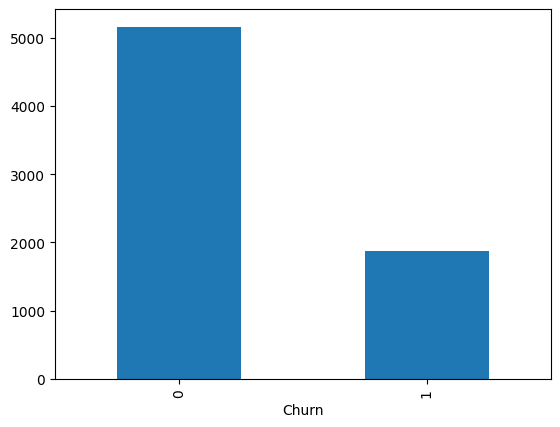

In [107]:
y.value_counts().plot(kind='bar');

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [111]:
# Разделение данных на тренировочную и тестовую части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Проверка размеров полученных наборов данных
print(f"Размер тренировочной выборки X: {X_train.shape}")
print(f"Размер тестовой выборки X: {X_test.shape}")
print(f"Размер тренировочной выборки y: {y_train.shape}")
print(f"Размер тестовой выборки y: {y_test.shape}")

Размер тренировочной выборки X: (4922, 19)
Размер тестовой выборки X: (2110, 19)
Размер тренировочной выборки y: (4922,)
Размер тестовой выборки y: (2110,)


Будем использовать Случайный лес (Random Forest) как модель для классификации. Этот алгоритм хорошо справляется с задачами классификации и может обрабатывать как числовые, так и категориальные признаки.

In [112]:
from sklearn.ensemble import RandomForestClassifier

# Создаем модель случайного леса
model = RandomForestClassifier(random_state=42)

In [113]:
from sklearn.metrics import accuracy_score, f1_score

# Обучаем модель
model.fit(X_train, y_train)

# Предсказываем результаты на тестовой выборке
y_pred = model.predict(X_test)

# Оцениваем производительность
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.78
F1 Score: 0.54


**Анализ результатов:**

1. Точность (Accuracy) - показывает, какая доля всех предсказаний модели оказалась верной. В нашем случае 78% предсказаний были правильными.
- Плюсы: Высокая точность может указывать на то, что модель хорошо справляется с задачей в целом.
- Минусы: Однако в задачах классификации с несбалансированными классами (например, если отток клиентов составляет лишь небольшую часть всех клиентов, как в нашем случае) высокая точность может быть обманчивой. Модель может просто предсказывать более распространенный класс.
2. F1 Score -  это гармоническое среднее между точностью (Precision) и полнотой (Recall). Он особенно полезен, когда необходимо учитывать как ложные положительные, так и ложные отрицательные результаты.
- Плюсы: F1 Score 0.54 указывает на то, что модель имеет проблемы с предсказанием положительного класса (оттока клиентов). Это означает, что модель либо не распознает клиентов, которые собираются уйти, либо слишком много клиентов ошибочно классифицирует как остающихся.
- Минусы: Значение F1 Score ниже 0.6 обычно считается низким и указывает на необходимость улучшения модели.

## **Шаги по улучшению модели**

### **1. Попробуем сбалансировать данные при помощи уменьшения выборки (Undersampling). Этот метод включает случайное удаление экземпляров класса большинства, чтобы достичь баланса с классом меньшинства. Это приведет к потере информации, но это, возможно, поможет нам улучшить производительность модели.**

In [118]:
from sklearn.utils import resample

# Объединяем X и y для удобства
df = pd.concat([X, y], axis=1)

# Отделяем класс меньшинства
df_minority = df[df['Churn'] == 1]
df_majority = df[df['Churn'] == 0]

# Уменьшаем размер класса большинства
df_majority_downsampled = resample(df_majority,
                                    replace=False,    # Без замены
                                    n_samples=len(df_minority), # Количество примеров класса меньшинства
                                    random_state=42) # Для воспроизводимости

# Объединяем обратно
df_balanced = pd.concat([df_majority_downsampled, df_minority])
X_balanced = df_balanced.drop('Churn', axis=1)
y_balanced = df_balanced['Churn']

In [119]:
# Разделение данных на тренировочную и тестовую части
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Проверка размеров полученных наборов данных
print(f"Размер тренировочной выборки X: {X_train.shape}")
print(f"Размер тестовой выборки X: {X_test.shape}")
print(f"Размер тренировочной выборки y: {y_train.shape}")
print(f"Размер тестовой выборки y: {y_test.shape}")

Размер тренировочной выборки X: (2616, 19)
Размер тестовой выборки X: (1122, 19)
Размер тренировочной выборки y: (2616,)
Размер тестовой выборки y: (1122,)


In [120]:
# Создаем модель случайного леса
model = RandomForestClassifier(random_state=42)

In [121]:
# Обучаем модель
model.fit(X_train, y_train)

# Предсказываем результаты на тестовой выборке
y_pred = model.predict(X_test)

# Оцениваем производительность
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.75
F1 Score: 0.75


**Вывод:**

После балансировки классов наша модель имеет точность (Accuracy) 0.75 и F1-меру (F1 Score) 0.75. Это указывает на то, что модель стала более сбалансированной в своих предсказаниях по сравнению с предыдущими результатами.

### **2. Попробуем настроить гиперпараметры модели, которые могут значительно улучшить ее производительность. Будем использовать GridSearchCV и RandomizedSearchCV из библиотеки scikit-learn для настройки гиперпараметров модели случайного леса (Random Forest).**

####***GridSearchCV***

In [124]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [122]:
# Определение признаков и целевой переменной
X_GridSearchCV = df.drop(columns=['Churn'])
y_GridSearchCV = df['Churn']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_GridSearchCV, y_GridSearchCV, test_size=0.2, random_state=42)

In [123]:
# Определение параметров для Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [125]:
# Создание модели случайного леса
rf = RandomForestClassifier(random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring='f1')

# Обучение модели с использованием Grid Search
grid_search.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Оценка производительности на тестовой выборке с лучшей моделью
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Печать отчета о классификации
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Лучшие параметры: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



**Вывод**

Наши результаты после настройки гиперпараметров модели случайного леса показывают, что мы достигли следующих лучших параметров:
- bootstrap: False
- max_depth: 10
- max_features: 'sqrt'
- min_samples_leaf: 2
- min_samples_split: 2
- n_estimators: 100

**Анализ результатов**

1. Отчет о классификации показывает следующие метрики:
***Precision (точность):***
- Класс 0 (не ушедшие клиенты): 0.83
- Класс 1 (ушедшие клиенты): 0.63

***Recall (полнота):***
- Класс 0: 0.90
- Класс 1: 0.49

***F1 Score:***
- Класс 0: 0.86
- Класс 1: 0.55
2. Общая точность модели составляет 79%, что является хорошим показателем, но стоит обратить внимание на метрики для класса оттока клиентов.

- Precision для класса 1 (ушедшие клиенты) равен 0.63, что означает, что из всех клиентов, которых модель предсказала как ушедших, только 63% действительно покинули компанию. Это указывает на наличие ложных срабатываний.
- Recall для класса 1 равен 0.49, что говорит о том, что модель правильно идентифицировала только около половины клиентов, которые фактически ушли. Это может быть проблемой, так как важно уметь выявлять клиентов, собирающихся уйти.
- F1 Score для класса 1 составляет 0.55, что указывает на необходимость улучшения модели в отношении класса оттока клиентов.

####***RandomizedSearchCV***

In [126]:
# Определение признаков и целевой переменной
X_RandomizedSearchCV = df.drop(columns=['Churn'])
y_RandomizedSearchCV = df['Churn']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_RandomizedSearchCV, y_RandomizedSearchCV, test_size=0.2, random_state=42)

In [127]:
# Определение параметров для Randomized Search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [128]:
# Настройка RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=3,
                                   n_jobs=-1,
                                   verbose=2,
                                   scoring='f1',
                                   random_state=42)

# Обучение модели с использованием Randomized Search
random_search.fit(X_train, y_train)

# Получение лучших параметров
best_params_random = random_search.best_params_
print("Лучшие параметры (Randomized Search):", best_params_random)

# Оценка производительности на тестовой выборке с лучшей моделью
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)

# Печать отчета о классификации
print(classification_report(y_test, y_pred_random))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
171 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
171 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Лучшие параметры (Randomized Search): {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



**Вывод**

Наши результаты после настройки гиперпараметров модели случайного леса показывают следующие лучшие параметры:
- n_estimators: 50
- min_samples_split: 2
- min_samples_leaf: 2
- max_features: 'sqrt'
- max_depth: 10
- bootstrap: True

**Анализ результатов**

1. Отчет о классификации показывает следующие метрики:

***Precision (точность):***
- Класс 0 (не ушедшие клиенты): 0.83
- Класс 1 (ушедшие клиенты): 0.66

***Recall (полнота):***
- Класс 0: 0.91
- Класс 1: 0.50

***F1 Score:***
- Класс 0: 0.87
- Класс 1: 0.57

2. Общая точность модели составляет 80%, что является хорошим показателем, но стоит обратить внимание на метрики для класса оттока клиентов.

- Precision для класса 1 (ушедшие клиенты) равен 0.66, что означает, что из всех клиентов, которых модель предсказала как ушедших, только 66% действительно покинули компанию. Это указывает на наличие ложных срабатываний.
- Recall для класса 1 равен 0.50, что говорит о том, что модель правильно идентифицировала только половину клиентов, которые фактически ушли. Это может быть проблемой, так как важно уметь выявлять клиентов, собирающихся уйти.
- F1 Score для класса 1 составляет 0.57, что указывает на необходимость улучшения модели в отношении класса оттока клиентов.

### **3. Попробуем использовать другую модель машинного обучения - XGBoost, но на сбалансированных данных.**

In [129]:
from xgboost import XGBClassifier

In [142]:
# Определение признаков и целевой переменной
X_balanced = df_balanced.drop('Churn', axis=1)
y_balanced = df_balanced['Churn']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [143]:
# Создание модели XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Обучение модели
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [144]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Печать отчета о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       379
           1       0.74      0.77      0.76       369

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



**Вывод**

1. Precision и Recall:
***Для класса 0 (не ушедшие клиенты)***
- Точность (Precision) составляет 0.77, что означает, что из всех клиентов, предсказанных как не ушедшие, 77% действительно остались.
- Полнота (Recall) составляет 0.74, что говорит о том, что модель правильно идентифицировала 74% клиентов, которые остались.

***Для класса 1 (ушедшие клиенты)***
- Точность (Precision) составляет 0.74, что означает, что из всех клиентов, предсказанных как ушедшие, 74% действительно покинули компанию.
- Полнота (Recall) составляет 0.77, что говорит о том, что модель правильно идентифицировала 77% клиентов, которые ушли.

2. F1 Score:
F1 Score для класса 1 составляет 0.76, что указывает на хорошую сбалансированность между точностью и полнотой для класса оттока клиентов.

3. Общая точность (Accuracy) составляет 75%, что является приемлемым показателем.

### **4. Попробуем использовать еще одну модель машинного обучения - логистическую регрессию также на сбалансированных данных.**

In [145]:
# Определение признаков и целевой переменной
X_balanced = df_balanced.drop('Churn', axis=1)
y_balanced = df_balanced['Churn']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [147]:
# Обучение логистической регрессии
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_logistic = logistic_model.predict(X_test)

# Оценка модели логистической регрессии
print("Логистическая регрессия:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

Логистическая регрессия:
Accuracy: 0.767379679144385
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       379
           1       0.75      0.80      0.77       369

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Вывод**

1. Precision и Recall:

***Для класса 0 (не ушедшие клиенты)***

- Точность (Precision) составляет 0.79, что означает, что из всех клиентов, предсказанных как не ушедшие, 79% действительно остались.
- Полнота (Recall) составляет 0.74, что говорит о том, что модель правильно идентифицировала 74% клиентов, которые остались.

***Для класса 1 (ушедшие клиенты):***

- Точность (Precision) составляет 0.75, что означает, что из всех клиентов, предсказанных как ушедшие, 75% действительно покинули компанию.
- Полнота (Recall) составляет 0.80, что говорит о том, что модель правильно идентифицировала 80% клиентов, которые ушли.

2. F1 Score для класса 1 составляет 0.77, что указывает на хорошую сбалансированность между точностью и полнотой для класса оттока клиентов.

3. Общая точность (Accuracy) составляет примерно 76.7%, что является хорошим показателем для задачи классификации.

### **5. Попробуем использовать метод опорных векторов также на сбалансированных данных.**

In [149]:
from sklearn.svm import SVC

In [150]:
# Определение признаков и целевой переменной
X_balanced = df_balanced.drop('Churn', axis=1)
y_balanced = df_balanced['Churn']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [151]:
# Обучение метода опорных векторов (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_svm = svm_model.predict(X_test)

# Оценка модели SVM
print("\nМетод опорных векторов (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Метод опорных векторов (SVM):
Accuracy: 0.7566844919786097
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       379
           1       0.74      0.77      0.76       369

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



**Вывод**

1. Precision и Recall:

***Для класса 0 (не ушедшие клиенты):***
- Точность (Precision) составляет 0.77, что означает, что из всех клиентов, предсказанных как не ушедшие, 77% действительно остались.
- Полнота (Recall) составляет 0.74, что говорит о том, что модель правильно идентифицировала 74% клиентов, которые остались.

***Для класса 1 (ушедшие клиенты):***
- Точность (Precision) составляет 0.74, что означает, что из всех клиентов, предсказанных как ушедшие, 74% действительно покинули компанию.
- Полнота (Recall) составляет 0.77, что говорит о том, что модель правильно идентифицировала 77% клиентов, которые ушли.

2. F1 Score для обоих классов составляет 0.76, что указывает на хорошую сбалансированность между точностью и полнотой.

3. Общая точность (Accuracy) составляет примерно 75.7%, что является приемлемым показателем для задачи классификации.

In [152]:
# Создание модели SVM с использованием радиальной базисной функции (RBF) в качестве ядра
svm_model_2 = SVC(kernel='rbf', random_state=42)

# Обучение модели
svm_model_2.fit(X_train, y_train)

SVC(random_state=42)

In [153]:
# Предсказание на тестовой выборке
y_pred_svm_2 = model.predict(X_test)

# Оценка модели SVM
print("\nМетод опорных векторов (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_2))
print(classification_report(y_test, y_pred_svm_2))


Метод опорных векторов (SVM):
Accuracy: 0.7540106951871658
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       379
           1       0.74      0.77      0.76       369

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



## **ИТОГ**

### Наилучших результатов при разработке модели для предсказания вероятности оттока клиентов в телекоммуникационной компании удалось достичь при использовании модели логистической регрессии на сбалансированных данных (4 вариант).